In [41]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
samples = 100
features = 2

mu1, mu2 = 10, 11
sigma1, sigma2 = 0.1, 0.2

X1 = sigma1 * np.random.randn(samples, features)+ mu1
X2 = sigma2 * np.random.randn(samples, features)+ mu2
X1.shape, X2.shape

((100, 2), (100, 2))

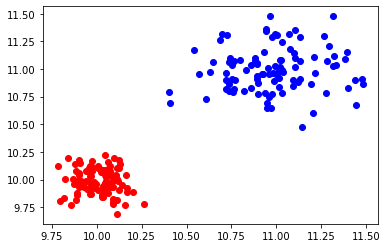

In [98]:
plt.scatter(X1[:,0],
           X1[:,1],
           color='red')
plt.scatter(X2[:,0],
           X2[:,1],
           color='blue')

In [99]:
X = np.concatenate([X1,X2], axis=0)
X.shape

(200, 2)

In [100]:
clustering = DBSCAN(eps=0.1, min_samples=2).fit(X)
print(clustering.labels_)
clustering

[ 0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1 -1  1  2  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1
  3  1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  3  2  1  1  1 -1  1  1
  1  1  1  1  1  3  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  2  1
  1  3  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


DBSCAN(eps=0.1, min_samples=2)

In [101]:
result = {}
result['data'] = []
result['label'] = []
for i in range(2*samples):
    result['data'].append( X[i] )
    result['label'].append( clustering.labels_[i])
    
    
for i, point in enumerate(result['label']):
    
    if point == -1: 
        result['label'][i] = len(set(result['label'])) - 1
        
print(len(result['label']), result['label'])

200 [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, -1, 1, 2, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 3, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 3, 2, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 3, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


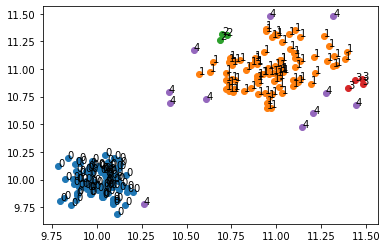

In [118]:

colors = sns.color_palette(n_colors = len(set(result['label'])))

for i in range(2*samples):
    plt.scatter(result['data'][i][0],
                result['data'][i][1],
                color = colors[result['label'][i]]                 
               )
    plt.text(result['data'][i][0],
            result['data'][i][1],
            result['label'][i]
            )
    

plt.show()
plt.close()